In [1]:
# load libraries and set plot parameters
import numpy as np
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

from IPython.display import display, Markdown, display_latex, Latex, display_markdown, Image
import sympy as s
s.init_printing()
from sympy.physics import units as u

## Dinamika  1/2 házi feladat megoldása

### Készítette Kovács András (N80PN7)

<font size="3">Adott az alábbi ábrán vázolt forgattyús mechanizmus, amelynek alapvető paraméterei az ábra jelöléseit felhasználva: $OA=0.3\,[m],\;$ $AB=1.2\,[m],\;$ $\varphi=300\,^o=\frac{5\pi}{3},\;$ $n=300\,[1/min].$

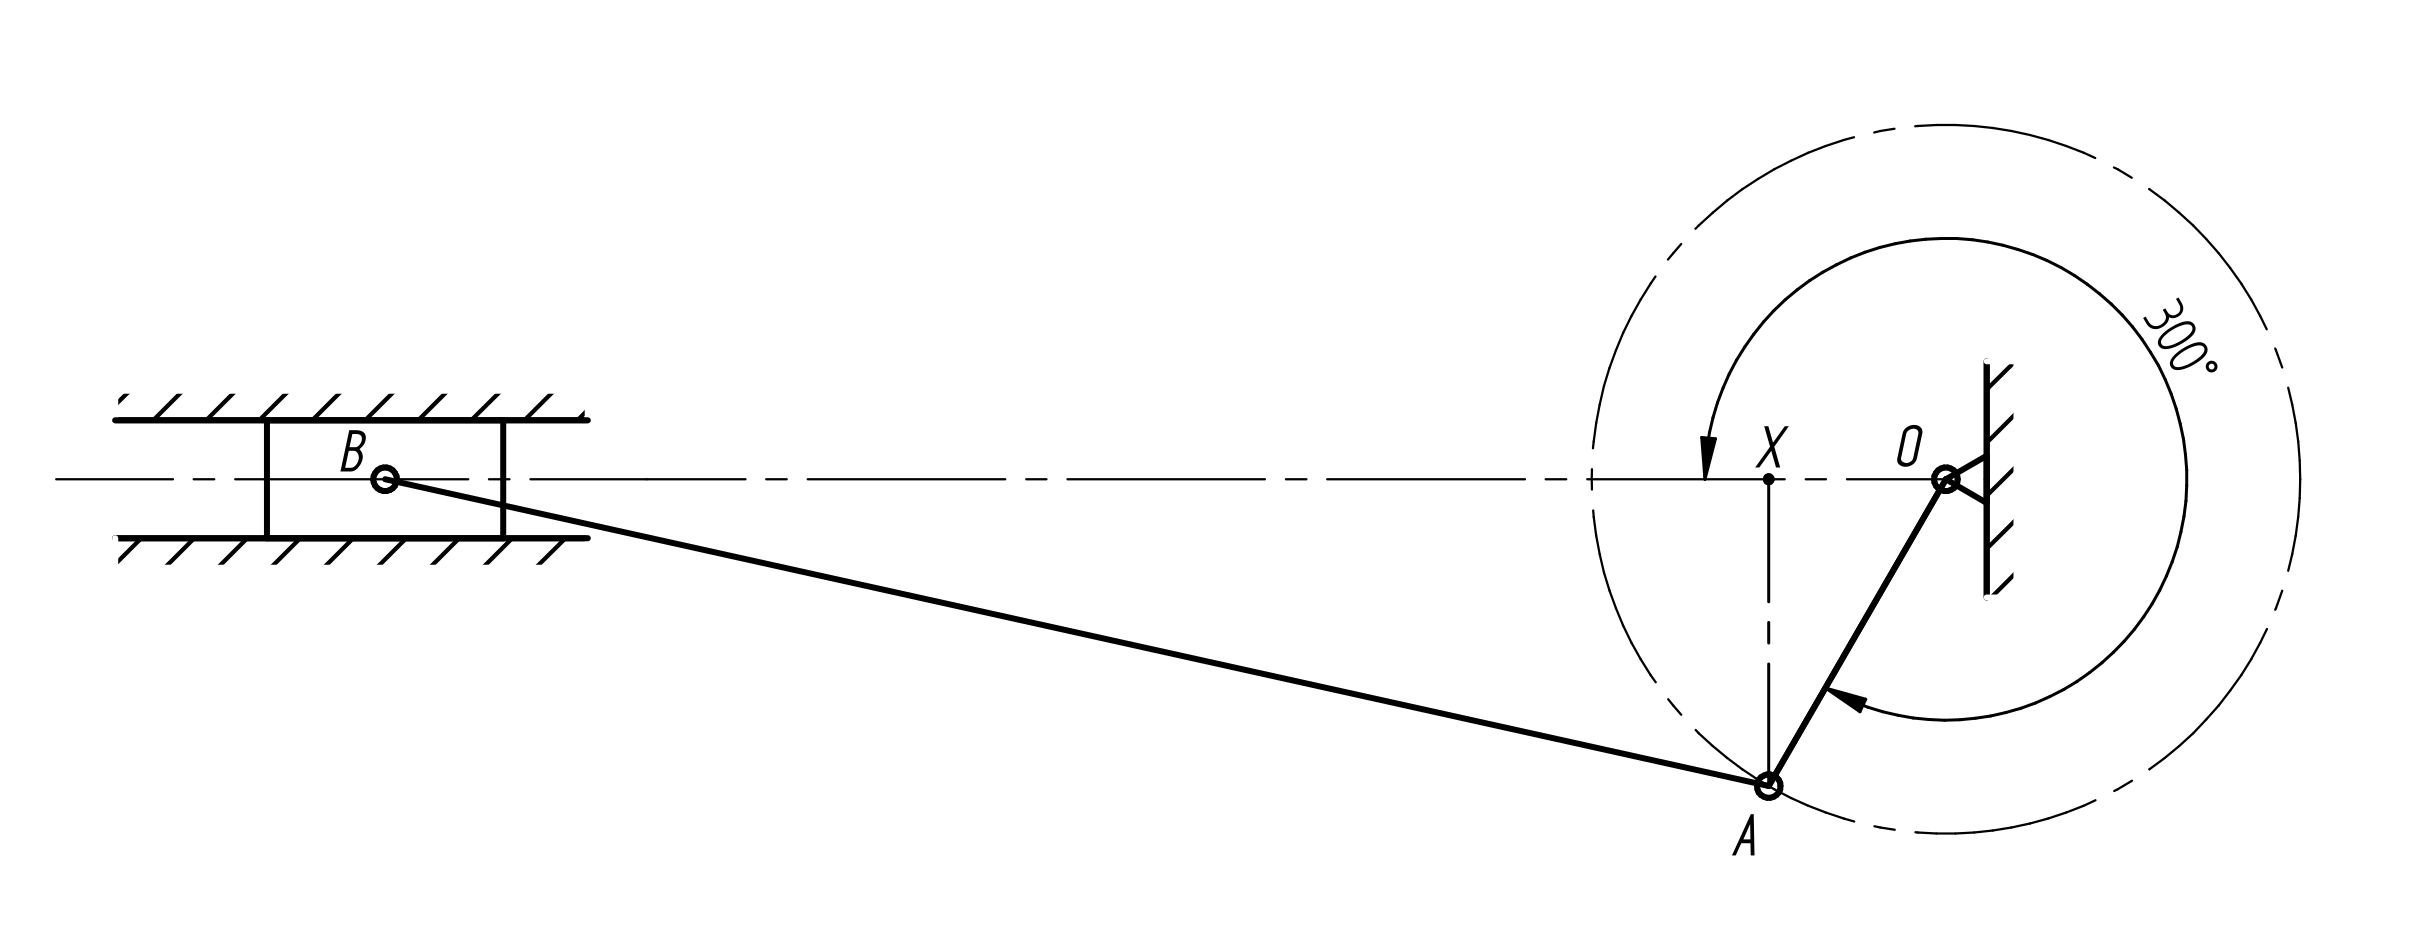

In [2]:
display(Image(filename=u"HF_1_ábra.png", width=850, height=300))

$$\omega =\frac{2\pi}{T} = \frac{2\pi \cdot n}{60} = 10\pi\,[1/s]$$

### I. $\small OB = S = s(t)$ meghatározása egzakt és közelítő módszerrel

In [3]:
# symbol definitions
oa, ab, ob, ax, ox, bx, t= s.symbols("OA AB OB AX OX, BX t")
fi = s.symbols(r'\varphi')
w = s.symbols(r'\omega')
S = s.symbols(r'S')
S_t = s.symbols(r's(t)')
Sk_t = s.symbols(r's_{k}(t)')
v = s.symbols(r'v(t)')
vk = s.symbols(r'v_{k}(t)')
a = s.symbols(r'a(t)')
ak = s.symbols(r'a_{k}(t)')

# numeric variables
w_val = 10 * s.pi
fi_val = 5 * s.pi / 3
oa_val = 0.3
ab_val = 1.2

In [4]:
display(s.Eq(ob, ox + bx))

In [5]:
display(s.Eq(bx**2, ab**2 - ax**2 ))

In [6]:
display(s.Eq(ox, oa * s.cos(w*t)))
# ox/ax

In [7]:
display(s.Eq(ax, oa * s.sin(w*t)))

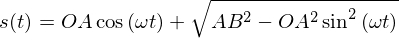

In [8]:
S_expr = s.sqrt(ab**2 - (oa*s.sin(w*t))**2) + oa*s.cos(w*t) 
display(s.Eq(S_t, S_expr))

<font size="3"> A fenti kifejezés gyökös része

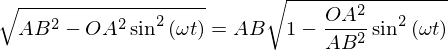

In [9]:
display(s.Eq(s.sqrt(ab**2 - (oa*s.sin(w*t))**2),ab*s.sqrt(1 - (oa/ab)**2 * s.sin(w*t)**2)))

<font size="3"> alakba is írható. Ekkor, ha fennál hogy $OA/AB\approx 0$, akkor:

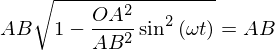

In [10]:
display(s.Eq(ab*s.sqrt(1 - (oa/ab)**2 * s.sin(w*t)**2), ab))

<font size="3"> Vagyis $s(t)$ közelítőleg:

In [11]:
S_expr_approx = oa*s.cos(w*t) + ab 
display(s.Eq(Sk_t, S_expr_approx))

### II. Pályasebesség

<font size="3"> A pályasebességet a mozgástörvény idő szerinti deriválásával kapjuk:

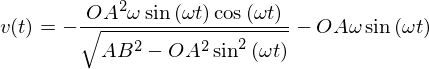

In [12]:
v_expr = s.diff(S_expr, t)
v_app_expr = s.diff(S_expr_approx,t)

a_expr = s.diff(v_expr, t)
a_app_expr = s.diff(v_app_expr,t)

display(s.Eq(v, v_expr))
display(s.Eq(vk, v_app_expr))

### III. Pályasebesség a megadott $\varphi$ pontban

<font size="3"> A fenti $v(t)$ függvénybe behelyettesítve $\omega t=\varphi=300\,^o=\frac{5\pi}{3},\;$, $\omega = 10\pi$ és a geometriai adatokat kapjuk, hogy:

In [13]:
v_subs = v_expr.subs(w*t, fi_val).subs(w, w_val).subs(oa, oa_val).subs(ab, ab_val)
display(Markdown(r'$$v(t) = ' + str(s.N(v_subs,4)) + r'\,[m/s]$$'))

$$v(t) = 9.207\,[m/s]$$

## IV. Egzakt és közelítő s-t diagram

In [14]:
S_e_s = S_expr.subs(w, w_val).subs(oa, oa_val).subs(ab, ab_val)
S_e_a_s = S_expr_approx.subs(w, w_val).subs(oa, oa_val).subs(ab, ab_val)


In [15]:
t_base = np.linspace(0,0.4,10000)

In [16]:
s_acc_calc =  s.lambdify(t, S_e_s, "numpy")(t_base)

In [17]:
s_app_calc =  s.lambdify(t, S_e_a_s, "numpy")(t_base)

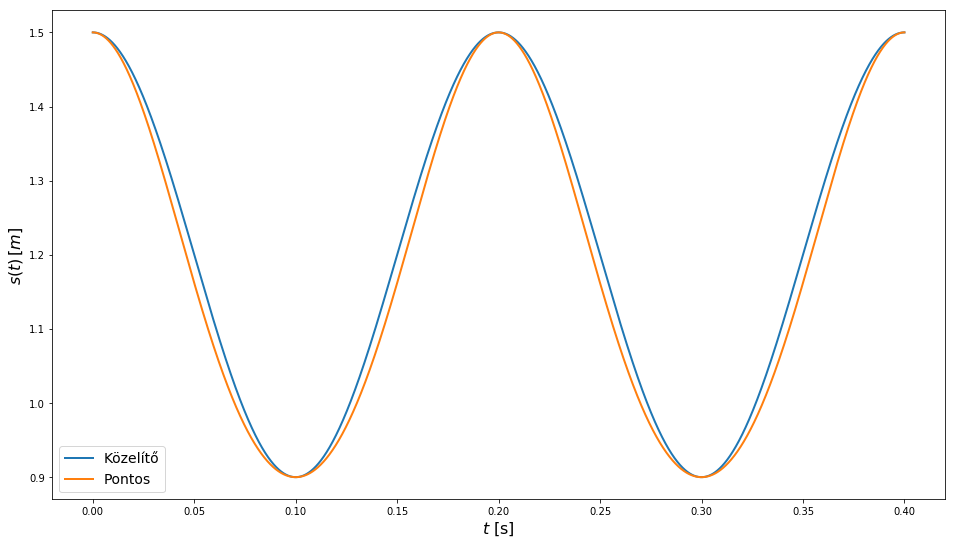

In [18]:
from matplotlib import pyplot as plt
from matplotlib import ticker
f1, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(t_base, s_app_calc, label=u"Közelítő")
ax1.plot(t_base, s_acc_calc, label=u"Pontos")
ax1.set_xlabel('$t$ [s]', fontsize=16)
ax1.set_ylabel('$s(t)\, [m]$ ', fontsize=16)
# ax1.plot(t_base, s_acc_calc - s_app_calc)
qwerty=ax1.legend()


<font size="3"> Ezen a ponton kezdett el igazán érdekelni a közelítő megoldás és a pontos számítás közötti különbség. A grafikus deriválás mellőzéséért cserébe elkészítettem a pályagyorulás diagramokat is, mind idő, mind út függvényében, és minden diagramon ábrázoltam mind a pontos, mind a közelítő számítás eredményeit.

### V. $v(t)$, $a(t)$ diagramok

In [19]:
v_sub_ = v_expr.subs(w, w_val).subs(oa, oa_val).subs(ab, ab_val)
# display(v_sub_)

v_app_sub_ = v_app_expr.subs(w, w_val).subs(oa, oa_val).subs(ab, ab_val)
# display(v_app_sub_)

a_sub_ = a_expr.subs(w, w_val).subs(oa, oa_val).subs(ab, ab_val)
# display(a_sub_)

a_app_sub_ = a_app_expr.subs(w, w_val).subs(oa, oa_val).subs(ab, ab_val)
# display(a_app_sub_)

In [20]:
v_s_c = s.lambdify(t, v_sub_, "numpy")(t_base)
# v_s_c.shape

v_app_s_c = s.lambdify(t, v_app_sub_, "numpy")(t_base)
# v_s_c.shape

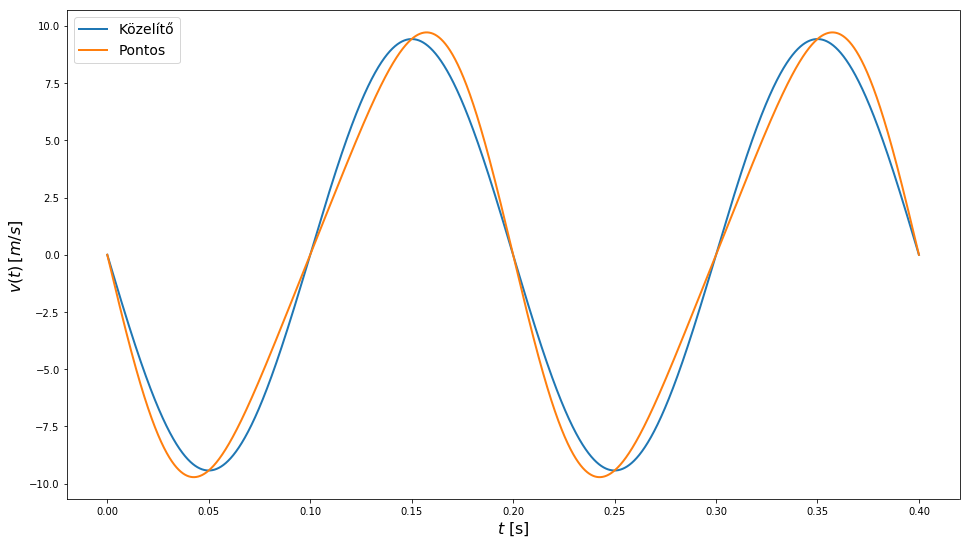

In [21]:
f2, ax2 = plt.subplots(figsize=(16,9))
ax2.plot(t_base, v_app_s_c, label=u"Közelítő")
ax2.plot(t_base, v_s_c, label=u"Pontos")
ax2.set_xlabel('$t$ [s]', fontsize=16)
ax2.set_ylabel('$v(t)\, [m/s]$ ', fontsize=16)
qwerty=ax2.legend()
# ax1.plot(t_base, s_acc_calc - s_app_calc)


In [22]:
a_s_c = s.lambdify(t, a_sub_, "numpy")(t_base)
# a_s_c.shape
a_app_s_c = s.lambdify(t, a_app_sub_, "numpy")(t_base)


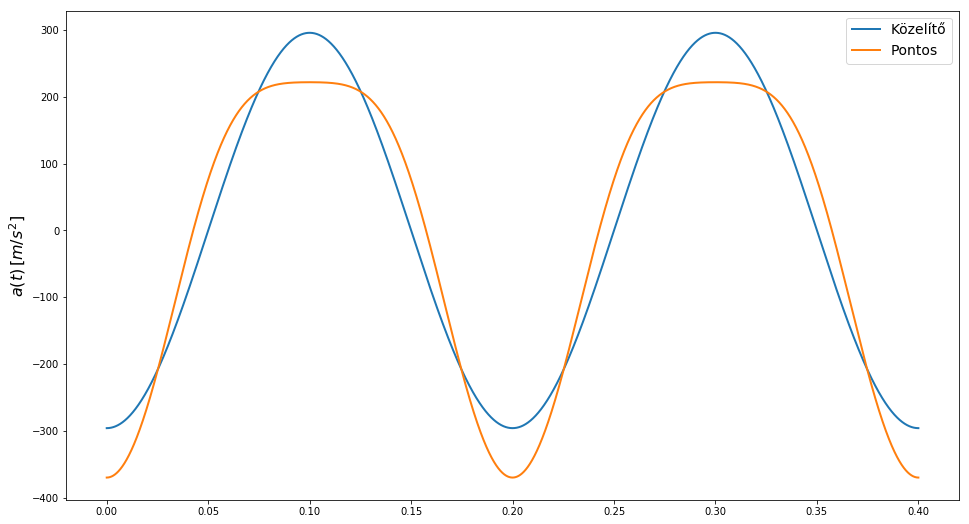

In [23]:
f4, ax4 = plt.subplots(figsize=(16,9))
ax4.plot(t_base, a_app_s_c, label=u"Közelítő")
ax4.plot(t_base, a_s_c, label=u"Pontos")
ax4.set_ylabel('$a(t)\, [m/s^2]$ ', fontsize=16)
qwerty=ax4.legend()

### VI. $v(s)$, $a(s)$  diagramok

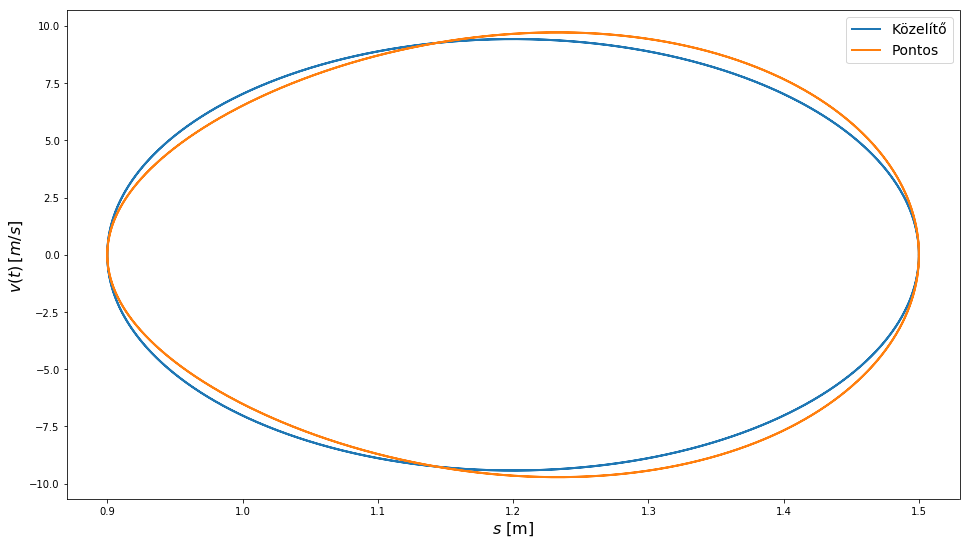

In [24]:
f3, ax3 = plt.subplots(figsize=(16,9))
ax3.plot(s_app_calc, v_app_s_c, label=u"Közelítő")
ax3.plot(s_acc_calc, v_s_c, label=u"Pontos")
ax3.set_xlabel('$s$ [m]', fontsize=16)
ax3.set_ylabel('$v(t)\, [m/s]$ ', fontsize=16)
qwerty=ax3.legend()

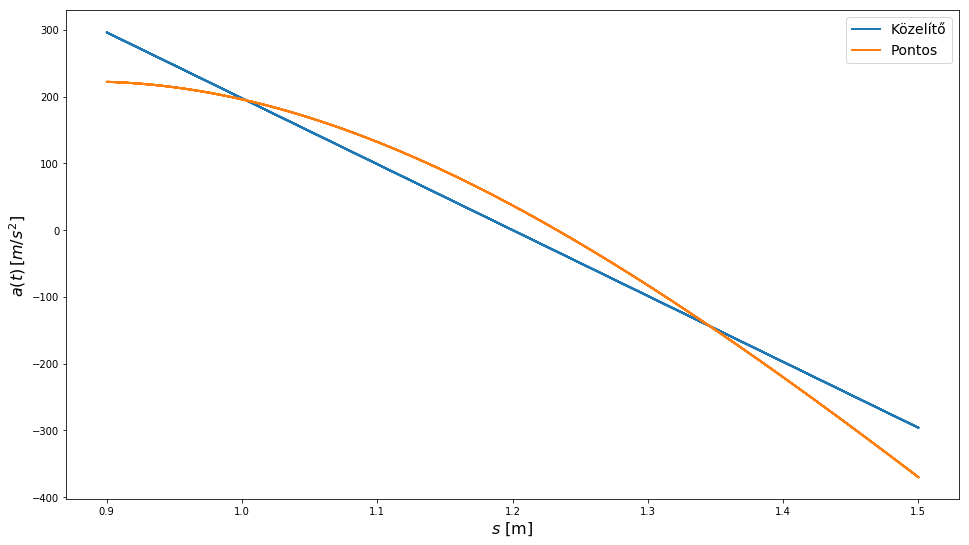

In [25]:
f5, ax5 = plt.subplots(figsize=(16,9))
ax5.plot(s_app_calc, a_app_s_c, label=u"Közelítő")
ax5.plot(s_acc_calc, a_s_c, label=u"Pontos")
ax5.set_xlabel('$s$ [m]', fontsize=16)
ax5.set_ylabel('$a(t)\, [m/s^2]$ ', fontsize=16)
qwertz = ax5.legend()